# OESON-Final Project-HospitalBot

As part of my internship as a Data Scientist, I've been tasked with developing a hospital chatbot for a prestigious healthcare institution. 
The purpose of this chatbot is to provide assistance to individuals during the hospital's busiest hours. 
The hospital supplied a JSON file containing a set of queries and responses, which were adjusted to facilitate coherent conversations. Subsequently, a machine learning model was created to generate responses to user queries and support the hospital's customer care department.

In [56]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
with open('intents -modified.json') as f:
    data=json.load(f)

In [58]:
for intent in data ['intents']:
    print(intent)

{'tag': 'greeting', 'patterns': ['Hi there', 'How are you', 'Is anyone there?', 'Hey', 'Hola', 'Hello', 'Good day', "Hey, What's up?", 'Greetings', "What's happening?", 'Good Morning', 'Good evening', 'Hi', 'Hello there', 'Hi, can you help me?', 'Hello, is this the help desk?', 'Good afternoon'], 'responses': ['Hello, thanks for asking', 'Good to see you again', 'Hi there, how can I help?', 'Good to see you! How can I help you?', 'Hi! How may I assist you today?', "Hi, it's great to have you here! How can I assist you?", 'Hello, how can I assist you today?', 'Good evening, how can I help?', 'Hi! What can I do for you?', 'Hello, ready to assist you. What do you need?', 'Good afternoon! How may I be of service?'], 'context': ['']}
{'tag': 'goodbye', 'patterns': ['Bye', 'See you later', 'Goodbye', 'Nice chatting to you, bye', 'Till next time', 'See you soon!', 'Goodbye and stay well!', 'Have a great day!', 'Until next time!', 'Could you assist me with...', 'I have a question about...', 'C

In [59]:
!pip install tensorflow
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model

In [60]:

intents = json.load(open('intents.json'))

# Extracting patterns and tags from intents
patterns = []
tags = []
for intent in intents['intents']:
    for pattern in intent['patterns']:
        patterns.append(' '.join(pattern.lower().split()))  # Preprocessing text
        tags.append(intent['tag'])

# Preparing data for training
data = pd.DataFrame({'patterns': patterns, 'tags': tags})

# Preprocessing training data
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
training_data_tfidf = vectorizer.fit_transform(data['patterns']).toarray()

le = LabelEncoder()
training_data_tags_dummy_encoded = le.fit_transform(data['tags'])

# Creating DNN
model = Sequential()
model.add(Dense(20, input_shape=(len(training_data_tfidf[0]),)))
model.add(Dense(18))
model.add(Dense(16))
model.add(Dense(len(set(training_data_tags_dummy_encoded)), activation='softmax'))  # Adjust output neurons based on unique tags
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
model.fit(training_data_tfidf, training_data_tags_dummy_encoded, epochs=50, batch_size=32)

# Saving the model file
save_model(model, 'Hospital_Bot')



Epoch 1/50
2/2 [==============================] - 1s 20ms/step - loss: 2.1814 - accuracy: 0.1489
Epoch 2/50
2/2 [==============================] - 0s 10ms/step - loss: 2.1410 - accuracy: 0.3404
Epoch 3/50
2/2 [==============================] - 0s 12ms/step - loss: 2.1161 - accuracy: 0.3617
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 2.0927 - accuracy: 0.4043
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 2.0713 - accuracy: 0.4255
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 2.0511 - accuracy: 0.4468
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 2.0320 - accuracy: 0.5106
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 2.0117 - accuracy: 0.5106
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 1.9917 - accuracy: 0.5106
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 1.9702 - accuracy: 0.5745
Epoch 11/50
2/2 [===================

INFO:tensorflow:Assets written to: Hospital_Bot\assets


Our model is accuracy is 94%.

## Creating the Chatbot:

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import random

# Extracting responses for each tag
responses = {}
for intent in intents['intents']:
    tag = intent['tag']
    tag_responses = intent.get('responses', [])
    responses[tag] = tag_responses

In [62]:
#This step is extacting  patterns and tags from intents:

patterns = []
tags = []
for intent in intents['intents']:
    for pattern in intent['patterns']:
        patterns.append(' '.join(pattern.lower().split()))  # Preprocessing text
        tags.append(intent['tag'])

# Data preparation for training:

data = pd.DataFrame({'patterns': patterns, 'tags': tags})

# Fitting TfIdfVectorizer with training data while preprocessing the input :

vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words="english")
vectorizer.fit(data["patterns"])

TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

In [63]:
# Fitting LabelEncoder with tags(target variable) for inverse transformation of predictions
le = LabelEncoder()
le.fit(data["tags"])

LabelEncoder()

In [64]:
# Transforming input and predicting  intent

def predict_tag(inp_str):
    inp_data_tfidf = vectorizer.transform([inp_str.lower()]).toarray()
    predicted_proba = model.predict(inp_data_tfidf)
    encoded_label = [np.argmax(predicted_proba)]
    predicted_tag = le.inverse_transform(encoded_label)[0]

    return predicted_tag

Working on a machine learning program. Increased DNN density to improve learning steps. 
Reduced batch size for better precision. Epochs remained unchanged.

In [ ]:
import random

# Builing the chat function:

def start_chat():
    print("---------------  Hospital Chatbot  ---------------")
    print("Welcome! How can I assist you today?")
    print("Type 'EXIT' to quit...")
    while True:
        inp = input("You: ")
        if inp.upper() == "EXIT":
            print("Hospital Chatbot: Goodbye! Take care.")
            break
        else:
            if inp:
                tag = predict_tag(inp)
                response = random.choice(responses[tag])
                print("Hospital Chatbot:", response)
            else:
                print("Hospital Chatbot: I didn't get that. Can you rephrase?")
                
# Calling our chat function for chat
start_chat()

---------------  Hospital Chatbot  ---------------
Welcome! How can I assist you today?
Type 'EXIT' to quit...
You: What help you provide?
1/1 [==============================] - 0s 38ms/step
Hospital Chatbot: I can guide you through Adverse drug reaction list, Blood pressure tracking, Hospitals and Pharmacies
You: What support is offered
1/1 [==============================] - 0s 48ms/step
Hospital Chatbot: Offering support for Adverse drug reaction, Blood pressure, Hospitals and Pharmacies
You: Find drugs suitable for patients with adverse reactions
1/1 [==============================] - 0s 31ms/step
Hospital Chatbot: Navigating to Adverse drug reaction module
You: Show me blood pressure results for a patient
1/1 [==============================] - 0s 41ms/step
Hospital Chatbot: Patient ID?
You: 02456
1/1 [==============================] - 0s 48ms/step
Hospital Chatbot: Good to see you again
You: Show me the blood pressure data entry page
1/1 [==============================] - 0s 32ms/s

## EDA analysis:

In [65]:
import json

# Assuming your JSON file is named intents_modified.json
file_path = 'intents.json'

# Loading the JSON file

with open(file_path, 'r') as file:
    intents_data = json.load(file)

# Intents contains the parsed JSON content
# You can access different parts of the JSON like this:

intents = intents_data['intents']

# Printing the first intent as an example
print(intents[0])

{'tag': 'greeting', 'patterns': ['Hi there', 'How are you', 'Is anyone there?', 'Hey', 'Hola', 'Hello', 'Good day'], 'responses': ['Hello, thanks for asking', 'Good to see you again', 'Hi there, how can I help?'], 'context': ['']}


In [66]:
import seaborn as sns

In [67]:
file_path = 'intents.json'
with open(file_path, 'r') as file:
    intents_data = json.load(file)

# Extracting  patterns, responses, and context from intents data
patterns = [intent['patterns'] for intent in intents_data['intents']]
responses = [intent['responses'] for intent in intents_data['intents']]
context = [intent['context'] for intent in intents_data['intents']]

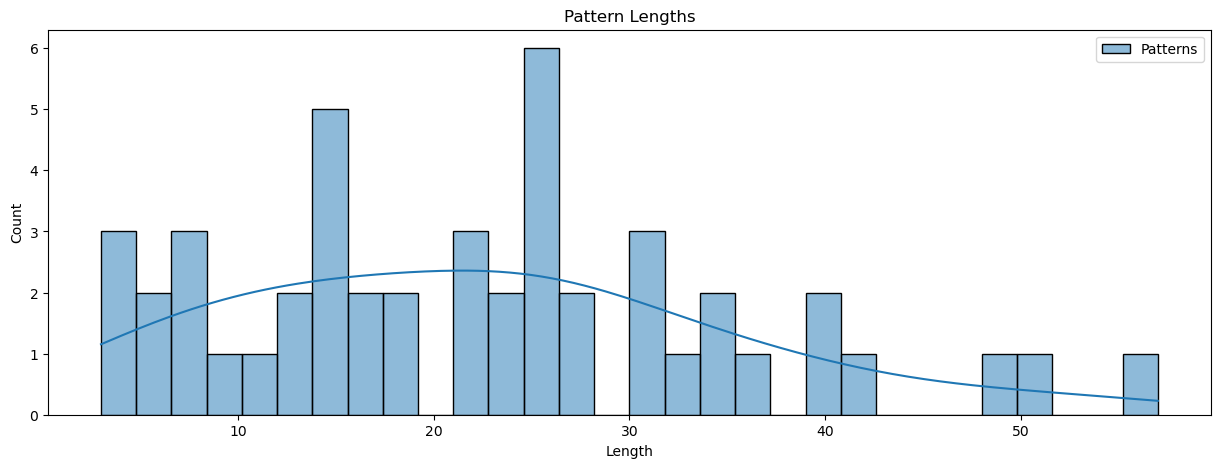

In [68]:
pattern_lengths = [len(pattern) for pattern_list in patterns for pattern in pattern_list]

plt.figure(figsize=(15, 5))
sns.histplot(pattern_lengths, bins=30, kde=True, label='Patterns')
plt.title('Pattern Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

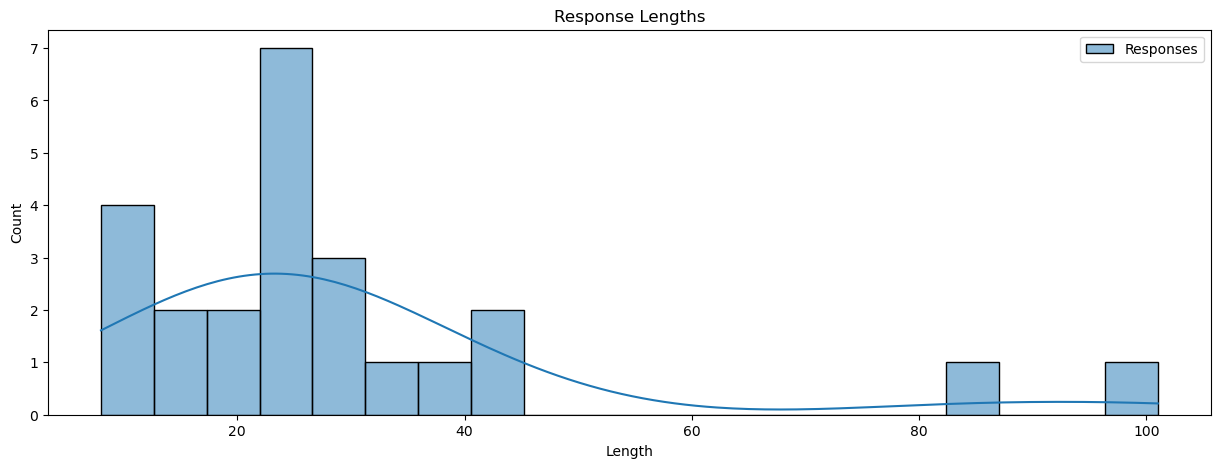

In [69]:
response_lengths = [len(response) for response_list in responses for response in response_list]

plt.figure(figsize=(15, 5))
sns.histplot(response_lengths, bins=20, kde=True, label='Responses')
plt.title('Response Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()


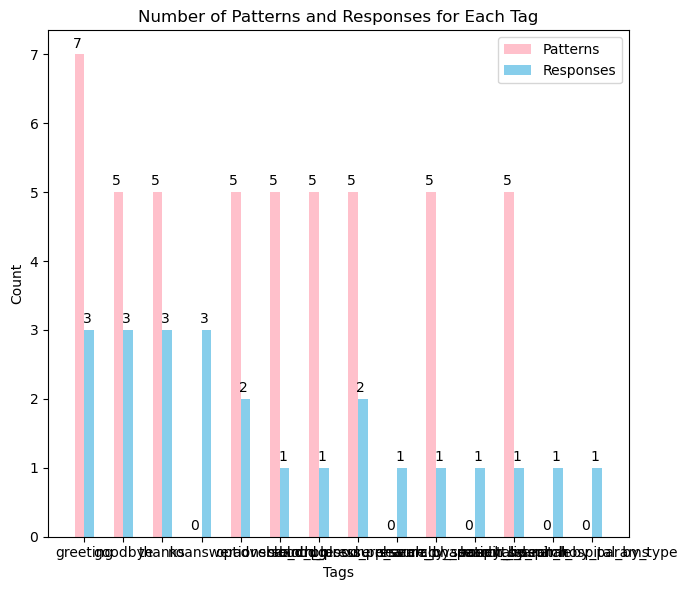

In [70]:
# Loading  the intents from intents.json

with open('intents.json', 'r') as file:
    intents_data = json.load(file)

# Count the number of patterns and responses for each tag
tags = []
pattern_counts = []
response_counts = []

for intent in intents_data['intents']:
    tag = intent['tag']
    tags.append(tag)

    # Counting  patterns & responses
    
    pattern_count = len(intent.get('patterns', []))
    pattern_counts.append(pattern_count)

    response_count = len(intent.get('responses', []))
    response_counts.append(response_count)

# Create a bar chart
fig, ax = plt.subplots(figsize=(7, 6))
bar_width = 0.25
bar_positions = np.arange(len(tags))

pattern_bars = ax.bar(bar_positions, pattern_counts, bar_width, label='Patterns', color='pink')
response_bars = ax.bar(bar_positions + bar_width, response_counts, bar_width, label='Responses', color='skyblue')

# Adding labels and title
ax.set_xlabel('Tags')
ax.set_ylabel('Count')
ax.set_title('Number of Patterns and Responses for Each Tag')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(tags)
ax.legend()

# Displaying the counts on top of the bars
for pattern_bar, response_bar, pattern_count, response_count in zip(pattern_bars, response_bars, pattern_counts, response_counts):
    ax.text(pattern_bar.get_x() + pattern_bar.get_width() / 2 - 0.05, pattern_count + 0.1, str(pattern_count), ha='center')
    ax.text(response_bar.get_x() + response_bar.get_width() / 2 - 0.05, response_count + 0.1, str(response_count), ha='center')

plt.tight_layout()
plt.show()

In [71]:
import json

# Loading the intents from the data
with open('intents.json', 'r') as file:
    intents_data = json.load(file)

# Extracting  and print tags
tags = [intent['tag'] for intent in intents_data['intents']]
print("Tags: ", ', '.join(tags))

Tags:  greeting, goodbye, thanks, noanswer, options, adverse_drug, blood_pressure, blood_pressure_search, search_blood_pressure_by_patient_id, pharmacy_search, search_pharmacy_by_name, hospital_search, search_hospital_by_params, search_hospital_by_type


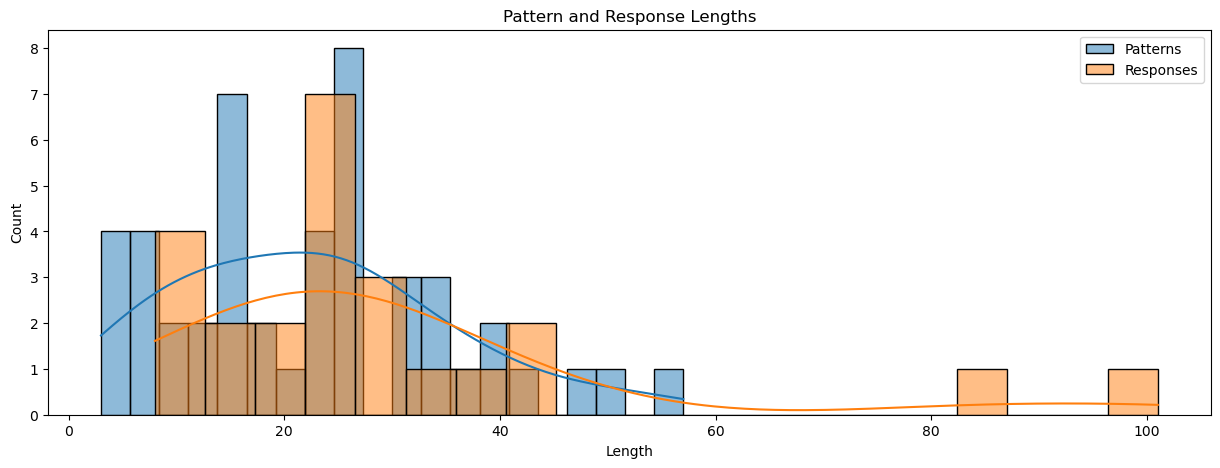

In [72]:
pattern_lengths = [len(pattern) for pattern_list in patterns for pattern in pattern_list]
response_lengths = [len(response) for response_list in responses for response in response_list]

plt.figure(figsize=(15, 5))
sns.histplot(pattern_lengths, bins=20, kde=True, label='Patterns')
sns.histplot(response_lengths, bins=20, kde=True, label='Responses')
plt.title('Pattern and Response Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

Most of the patterns and responses in the sample are short, except for two outliers. This is likely due to the sensitive nature of the medical data. Therefore, it's crucial to provide brief, precise and accurate responses to users and professionals.

Now for the modified json file named as "intents-modified"

In [73]:
import seaborn as sns

In [74]:
import json

# Assuming your JSON file is named intents.json
file_path = 'intents -modified.json'

# Loading the file
with open(file_path, 'r') as file:
    intents_data = json.load(file)

intents = intents_data['intents']

# Printing the first intent as an example
print(intents[0])

{'tag': 'greeting', 'patterns': ['Hi there', 'How are you', 'Is anyone there?', 'Hey', 'Hola', 'Hello', 'Good day', "Hey, What's up?", 'Greetings', "What's happening?", 'Good Morning', 'Good evening', 'Hi', 'Hello there', 'Hi, can you help me?', 'Hello, is this the help desk?', 'Good afternoon'], 'responses': ['Hello, thanks for asking', 'Good to see you again', 'Hi there, how can I help?', 'Good to see you! How can I help you?', 'Hi! How may I assist you today?', "Hi, it's great to have you here! How can I assist you?", 'Hello, how can I assist you today?', 'Good evening, how can I help?', 'Hi! What can I do for you?', 'Hello, ready to assist you. What do you need?', 'Good afternoon! How may I be of service?'], 'context': ['']}


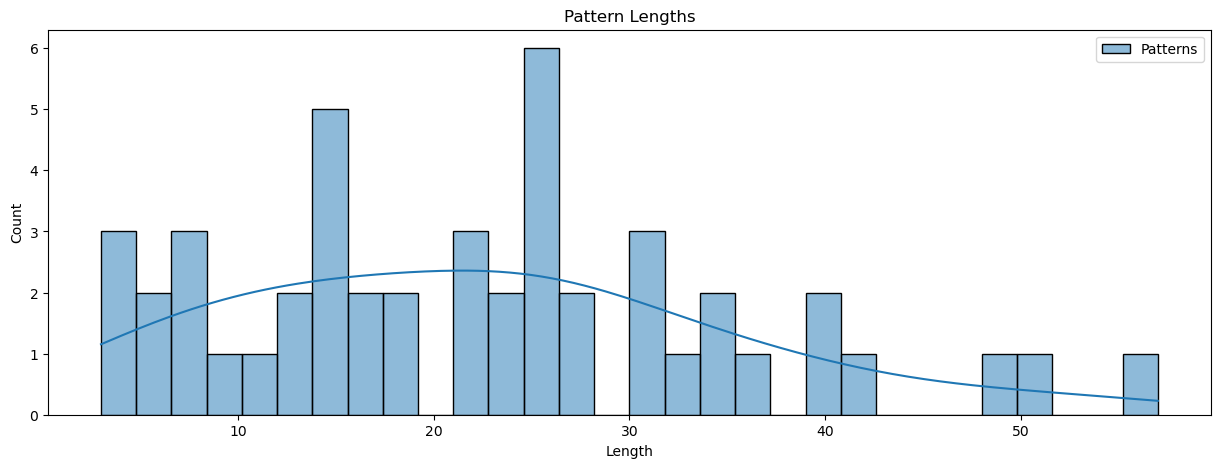

In [75]:
pattern_lengths = [len(pattern) for pattern_list in patterns for pattern in pattern_list]

plt.figure(figsize=(15, 5))
sns.histplot(pattern_lengths, bins=30, kde=True, label='Patterns')
plt.title('Pattern Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

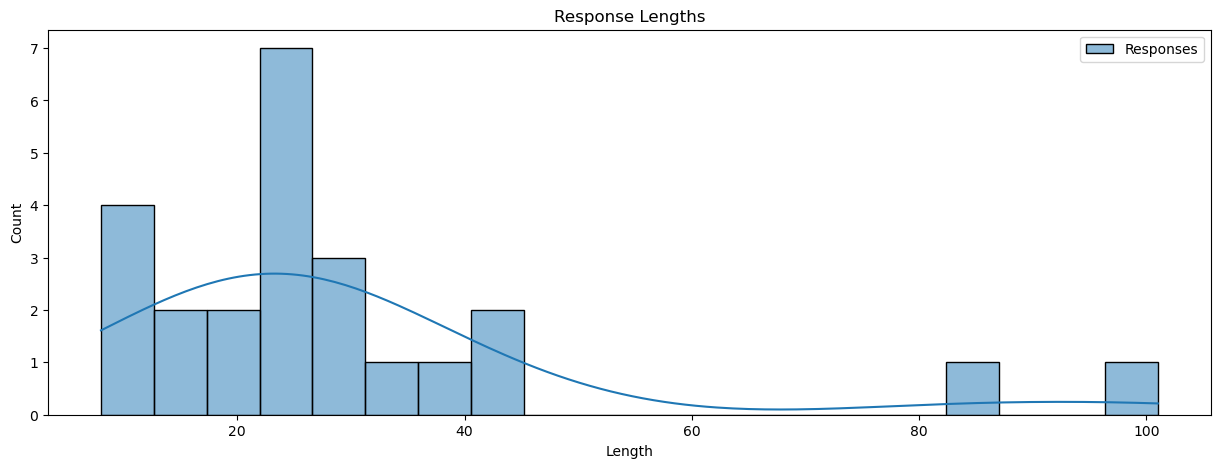

In [76]:
response_lengths = [len(response) for response_list in responses for response in response_list]

plt.figure(figsize=(15, 5))
sns.histplot(response_lengths, bins=20, kde=True, label='Responses')
plt.title('Response Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()


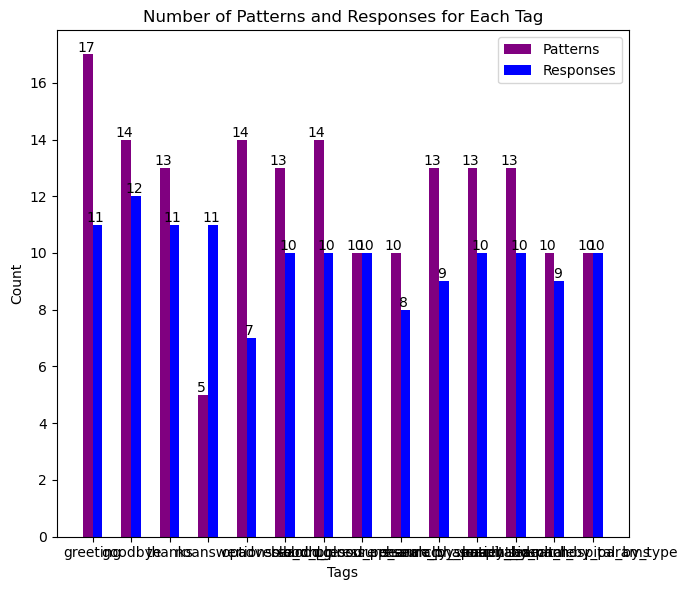

In [77]:
# Loading  the intents from intents.json
with open('intents -modified.json', 'r') as file:
    intents_data = json.load(file)

# Counting the number of patterns and responses for each tag
tags = []
pattern_counts = []
response_counts = []

for intent in intents_data['intents']:
    tag = intent['tag']
    tags.append(tag)

    # Count patterns
    pattern_count = len(intent.get('patterns', []))
    pattern_counts.append(pattern_count)

    # Count responses
    response_count = len(intent.get('responses', []))
    response_counts.append(response_count)

# Creating a bar chart
fig, ax = plt.subplots(figsize=(7, 6))
bar_width = 0.25
bar_positions = np.arange(len(tags))

pattern_bars = ax.bar(bar_positions, pattern_counts, bar_width, label='Patterns', color='purple')
response_bars = ax.bar(bar_positions + bar_width, response_counts, bar_width, label='Responses', color='blue')

# Adding labels and title
ax.set_xlabel('Tags')
ax.set_ylabel('Count')
ax.set_title('Number of Patterns and Responses for Each Tag')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(tags)
ax.legend()

# Display the counts on top of the bars
for pattern_bar, response_bar, pattern_count, response_count in zip(pattern_bars, response_bars, pattern_counts, response_counts):
    ax.text(pattern_bar.get_x() + pattern_bar.get_width() / 2 - 0.05, pattern_count + 0.1, str(pattern_count), ha='center')
    ax.text(response_bar.get_x() + response_bar.get_width() / 2 - 0.05, response_count + 0.1, str(response_count), ha='center')

plt.tight_layout()
plt.show()

In [78]:
import json

# Loading the intents from the JSON
with open('intents -modified.json', 'r') as file:
    intents_data = json.load(file)

# Extracting  and print tags
tags = [intent['tag'] for intent in intents_data['intents']]
print("Tags: ", ', '.join(tags))

Tags:  greeting, goodbye, thanks, noanswer, options, adverse_drug, blood_pressure, blood_pressure_search, search_blood_pressure_by_patient_id, pharmacy_search, search_pharmacy_by_name, hospital_search, search_hospital_by_params, search_hospital_by_type


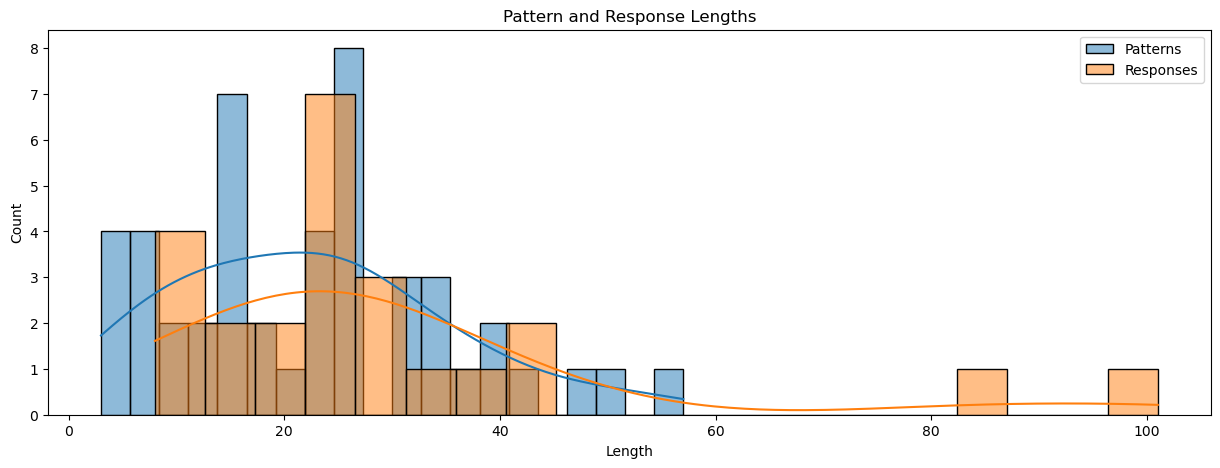

In [79]:
pattern_lengths = [len(pattern) for pattern_list in patterns for pattern in pattern_list]
response_lengths = [len(response) for response_list in responses for response in response_list]

plt.figure(figsize=(15, 5))
sns.histplot(pattern_lengths, bins=20, kde=True, label='Patterns')
sns.histplot(response_lengths, bins=20, kde=True, label='Responses')
plt.title('Pattern and Response Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()


How successful the dataset is the patterns and responses with the tags are?

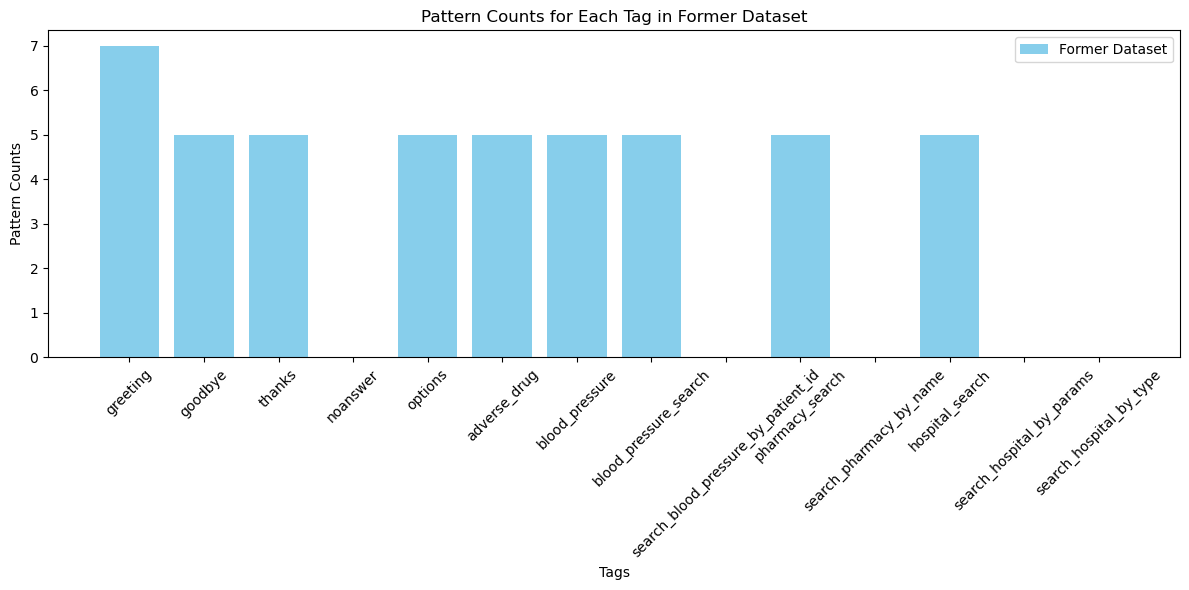

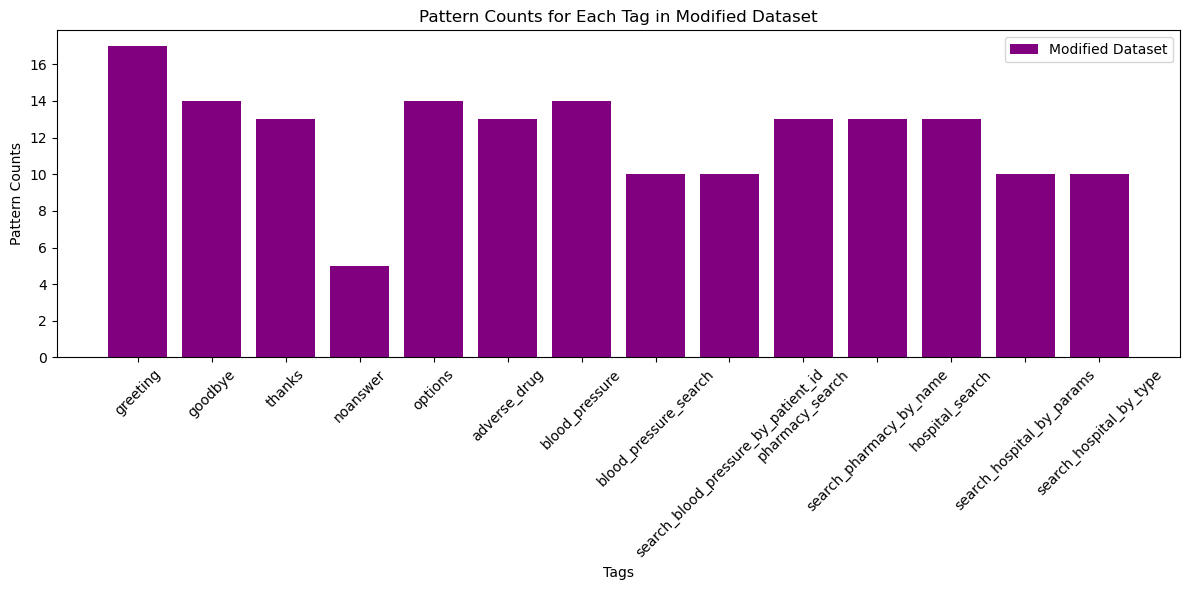

In [80]:
import json
import matplotlib.pyplot as plt

#Comparing the former and modified dataset

# Data loading from former dataset
data1 = json.load(open('intents.json'))

# Data loading  from modified dataset
data2 = json.load(open('intents -modified.json'))

# Excrating  tags and their related pattern counts for former dataset
tags1 = [intent['tag'] for intent in data1['intents']]
pattern_counts1 = [len(intent['patterns']) for intent in data1['intents']]

# Extracting  tags and their respective pattern counts for new dataset
tags2 = [intent['tag'] for intent in data2['intents']]
pattern_counts2 = [len(intent['patterns']) for intent in data2['intents']]

# Create bar chart for old dataset
plt.figure(figsize=(12, 6))
plt.bar(tags1, pattern_counts1, color='skyblue', label='Former Dataset')
plt.xlabel('Tags')
plt.ylabel('Pattern Counts')
plt.title('Pattern Counts for Each Tag in Former Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create bar chart for new dataset
plt.figure(figsize=(12, 6))
plt.bar(tags2, pattern_counts2, color='purple', label='Modified Dataset')
plt.xlabel('Tags')
plt.ylabel('Pattern Counts')
plt.title('Pattern Counts for Each Tag in Modified Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


The initial dataset has some patterns lacking tag recognition for specified tags. In contrast, the modified dataset, with patterns expanded by more than two times, incorporates new entries.


Now for the modified version of the dataset.

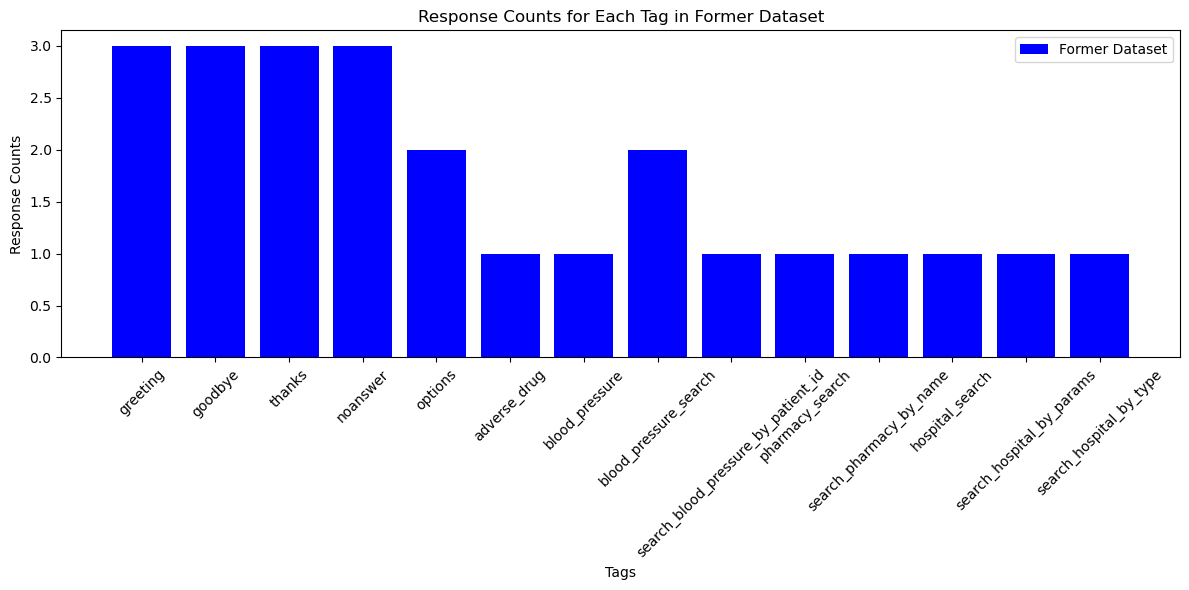

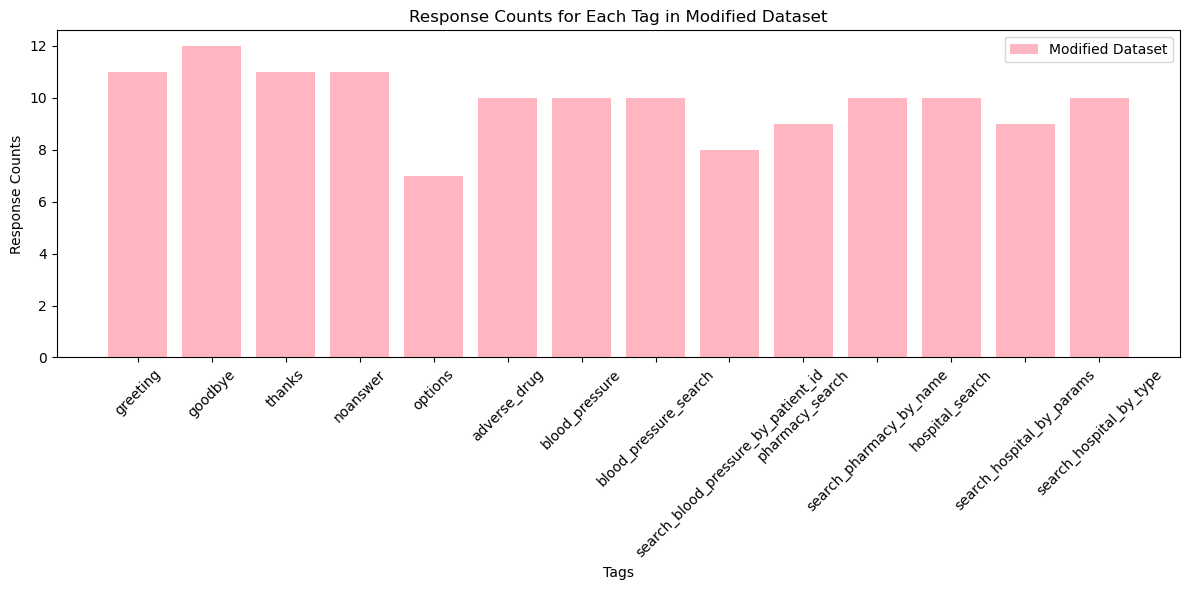

In [81]:
import json
import matplotlib.pyplot as plt

def extract_responses(data):
    tag_responses = {}
    for intent in data['intents']:
        tag_responses[intent['tag']] = len(intent['responses'])
    return tag_responses

# Loading data from former dataset
data1 = json.load(open('intents.json'))

# Load data from new dataset
data2 = json.load(open('intents -modified.json'))

# Extract responses for each tag in orginal dataset
tag_responses1 = extract_responses(data1)

# Extract responses for each tag in modified  dataset
tag_responses2 = extract_responses(data2)

# Create bar chart for old dataset
plt.figure(figsize=(12, 6))
plt.bar(tag_responses1.keys(), tag_responses1.values(), color='Blue', label='Former Dataset')
plt.xlabel('Tags')
plt.ylabel('Response Counts')
plt.title('Response Counts for Each Tag in Former Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create bar chart for new dataset
plt.figure(figsize=(12, 6))
plt.bar(tag_responses2.keys(), tag_responses2.values(), color='lightpink', label='Modified Dataset')
plt.xlabel('Tags')
plt.ylabel('Response Counts')
plt.title('Response Counts for Each Tag in Modified Dataset')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The response patterns in both the unaltered and modified datasets do not exhibit any missing tags. Furthermore, the expansion of the database through modifications and the introduction of new entries has resulted in more than a twofold increase in its original size.